In [ ]:
#libraries
from sklearn.neighbors import KNeighborsClassifier , NearestNeighbors
from sklearn.metrics import accuracy_score , classification_report
from sklearn import svm 
from sklearn.naive_bayes import GaussianNB
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

#class of dataset preprocessing
class dataset_preprocessing:

  #constructor
  def __init__(self):
        self.fashion_mnist = tf.keras.datasets.fashion_mnist
        self.class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        (self.train_images, self.train_labels), (self.test_images, self.test_labels) = self.fashion_mnist.load_data()
        self.flatt_train_images=[]
        self.flatt_test_images=[]     

  #This function normalize the images of the dataset. The intensity of pixels changes from the range 0-255 to the range 0-1(float).
  def normalization(self):
        self.train_images = self.train_images / 255.0
        self.test_images = self.test_images / 255.0

  #This function reduces the dimensions of initial images. For example if we enter input 80 , we get the 80% of initial image.
  def dimensions_reduce(self):
      scale_percent=float(input("please enter the percent of reduce in the images: "))      
      for i in range(len(self.test_images)):
        width = int(self.test_images[i].shape[1] * scale_percent / 100)
        height = int(self.test_images[i].shape[0] * scale_percent / 100)
        dim = (width, height)
        resized = cv2.resize(self.test_images[i], dim, interpolation = cv2.INTER_AREA)
        self.flatt_test_images.append(resized.flatten())
      for i in range(len(self.train_images)):
        width = int(self.train_images[i].shape[1] * scale_percent / 100)
        height = int(self.train_images[i].shape[0] * scale_percent / 100)
        dim = (width, height)
        resized = cv2.resize(self.train_images[i], dim, interpolation = cv2.INTER_AREA)
        self.flatt_train_images.append(resized.flatten())

In [ ]:
#class of machine learning methods
class ml_methods:
  
  #constructor
  def __init__(self,obj):
    self.predicts_test=[]
    self.dataset_obj=obj
    self.flag=0
    self.predictions=[[]]

  #Knn method.Metric can be 'euclidean','manhattan','cosine'.
  def knn(self,metric): 
    self.flag=0
    n=int(input("please enter the number of neighbors: ")) 
    neigh = KNeighborsClassifier(n_neighbors=n,metric=metric)
    neigh.fit(self.dataset_obj.flatt_train_images,self.dataset_obj.train_labels )
    pred_images=np.array(self.dataset_obj.flatt_test_images,dtype='float32')
    self.predicts_test=neigh.predict(pred_images)

  #neural network with 2 hidden layers and the output layer uses the Softmax activation function.
  def neural_network_2hlayers(self):
    self.flag=1
    n=int(input("please enter the number of epochs: ")) 
    model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),tf.keras.layers.Dense(500, activation='sigmoid'),tf.keras.layers.Dense(200, activation='sigmoid'),tf.keras.layers.Dense(10)])
    model.compile(optimizer='SGD',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    model.fit(self.dataset_obj.train_images, self.dataset_obj.train_labels, epochs=n)
    test_loss, test_acc = model.evaluate(self.dataset_obj.test_images, self.dataset_obj.test_labels, verbose=2)
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    self.predictions = probability_model.predict(self.dataset_obj.test_images)

  #support vector machine method. Kernel type can be ‘linear’, ‘poly’, ‘rbf’(Gaussian), ‘sigmoid’, ‘precomputed’ .
  def svm(self,ktype):
    self.flag=0
    clf = svm.SVC(kernel=ktype,decision_function_shape='ovr')
    clf.fit(self.dataset_obj.flatt_train_images,self.dataset_obj.train_labels)
    dec=clf.decision_function(self.dataset_obj.flatt_test_images)
    self.predicts_test=clf.predict(self.dataset_obj.flatt_test_images)

  #bayes method. The least efficient method!
  def bayes(self):
    self.flag=0
    gnb = GaussianNB()
    self.predicts_test = gnb.fit(self.dataset_obj.flatt_train_images,self.dataset_obj.train_labels).predict(self.dataset_obj.flatt_test_images)

  #This function displays variety of metrics and the predictions of every image.
  def visualization(self):
    if self.flag==0:
      print("\n"+classification_report(self.dataset_obj.test_labels,self.predicts_test))
      for i in range(10):
        plt.figure(figsize=(5,5))
        plt.imshow(self.dataset_obj.test_images[i], cmap=plt.cm.binary)
        print('   real: '+self.dataset_obj.class_names[self.dataset_obj.test_labels[i]]+'   pred: '+self.dataset_obj.class_names[self.predicts_test[i]])
        plt.show()
    else:
      for i in range(10):
       plt.figure(figsize=(4,4))
       plt.imshow(self.dataset_obj.test_images[i],cmap='gray')
       print('   real: '+self.dataset_obj.class_names[self.dataset_obj.test_labels[i]]+'   pred: '+self.dataset_obj.class_names[np.argmax(self.predictions[i])])
       plt.show()
       for j in range(10):
          print("propability to be {} is {:2.5f}% ".format(self.dataset_obj.class_names[j],100*self.predictions[i][j]))
       print('-----------------------------------\n\n\n')
    


please enter the percent of reduce in the images: 50
please enter the number of neighbors: 5

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.74      0.80      0.77      1000
           3       0.91      0.88      0.89      1000
           4       0.76      0.83      0.79      1000
           5       1.00      0.82      0.90      1000
           6       0.74      0.58      0.65      1000
           7       0.90      0.95      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.87      0.97      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

   real: Ankle boot   pred: Ankle boot


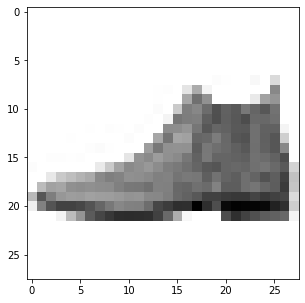

   real: Pullover   pred: Pullover


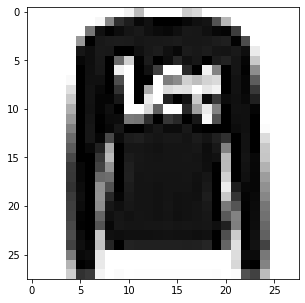

   real: Trouser   pred: Trouser


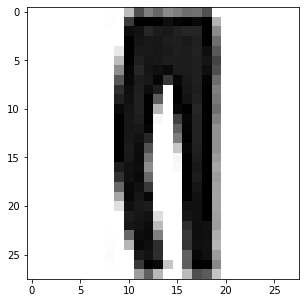

   real: Trouser   pred: Trouser


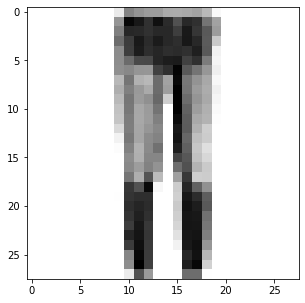

   real: Shirt   pred: T-shirt/top


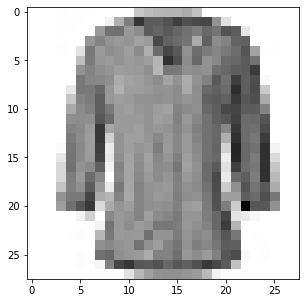

   real: Trouser   pred: Trouser


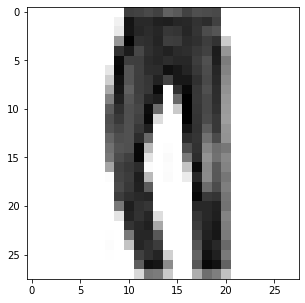

   real: Coat   pred: Coat


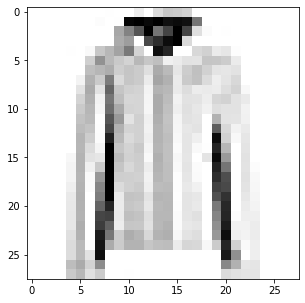

   real: Shirt   pred: Shirt


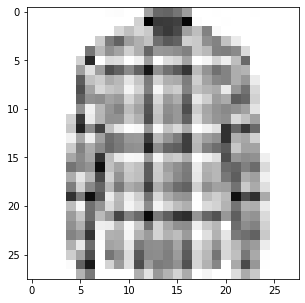

   real: Sandal   pred: Sandal


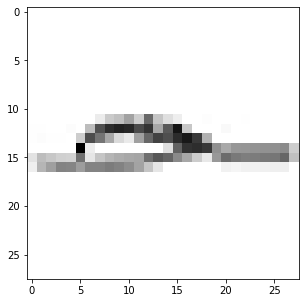

   real: Sneaker   pred: Sneaker


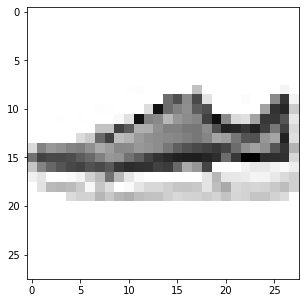

In [ ]:
images_data=dataset_preprocessing()
images_data.normalization()
images_data.dimensions_reduce()
ml=ml_methods(images_data)
ml.knn('cosine')
ml.visualization()



              precision    recall  f1-score   support

           0       0.81      0.62      0.70      1000
           1       0.70      0.92      0.80      1000
           2       0.60      0.35      0.44      1000
           3       0.46      0.64      0.53      1000
           4       0.40      0.76      0.52      1000
           5       0.91      0.28      0.43      1000
           6       0.33      0.06      0.10      1000
           7       0.52      0.99      0.68      1000
           8       0.84      0.73      0.78      1000
           9       0.91      0.70      0.79      1000

    accuracy                           0.60     10000
   macro avg       0.65      0.60      0.58     10000
weighted avg       0.65      0.60      0.58     10000

   real: Ankle boot   pred: Sneaker


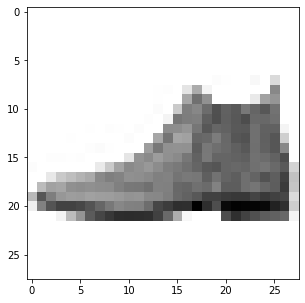

   real: Pullover   pred: Coat


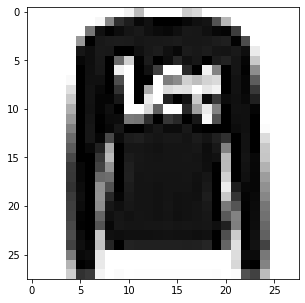

   real: Trouser   pred: Trouser


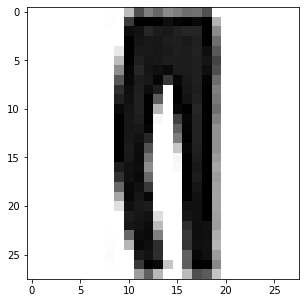

   real: Trouser   pred: Trouser


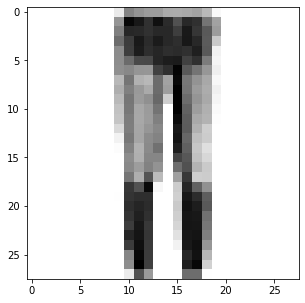

   real: Shirt   pred: Pullover


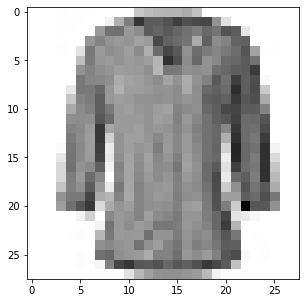

   real: Trouser   pred: Trouser


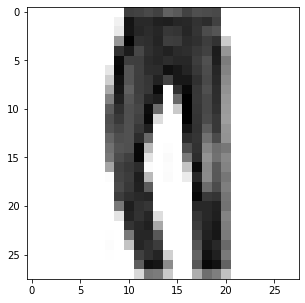

   real: Coat   pred: Dress


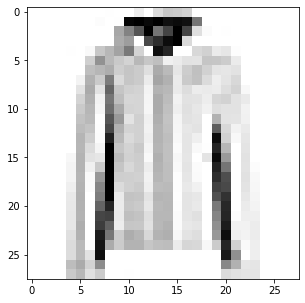

   real: Shirt   pred: Coat


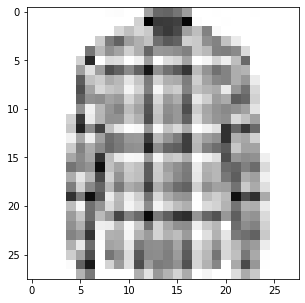

   real: Sandal   pred: Sneaker


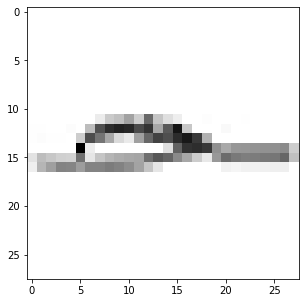

   real: Sneaker   pred: Sneaker


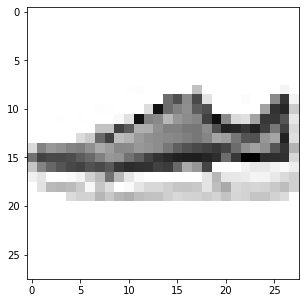

In [ ]:
ml.bayes()
ml.visualization()

please enter the number of epochs: 20
Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 1.8538 - accuracy: 0.4899
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0824 - accuracy: 0.6863
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8307 - accuracy: 0.7282
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7215 - accuracy: 0.7449
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6647 - accuracy: 0.7570
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6284 - accuracy: 0.7695
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6008 - accuracy: 0.7809
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5786 - accuracy: 0.7908
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5596 - accuracy: 0.7985
Epoch 10/20
1875/1875 [============

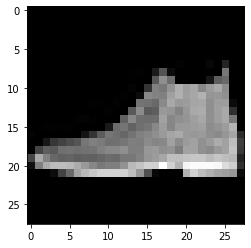

propability to be T-shirt/top is 0.00039% 
propability to be Trouser is 0.00018% 
propability to be Pullover is 0.00178% 
propability to be Dress is 0.00237% 
propability to be Coat is 0.00154% 
propability to be Sandal is 10.49491% 
propability to be Shirt is 0.00264% 
propability to be Sneaker is 34.94365% 
propability to be Bag is 0.41827% 
propability to be Ankle boot is 54.13427% 
-----------------------------------



   real: Pullover   pred: Pullover


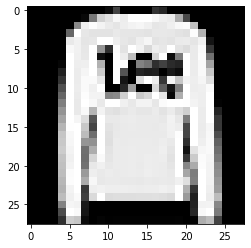

propability to be T-shirt/top is 0.11208% 
propability to be Trouser is 0.01068% 
propability to be Pullover is 84.86484% 
propability to be Dress is 0.04012% 
propability to be Coat is 1.41566% 
propability to be Sandal is 0.00055% 
propability to be Shirt is 13.52900% 
propability to be Sneaker is 0.00000% 
propability to be Bag is 0.02705% 
propability to be Ankle boot is 0.00001% 
-----------------------------------



   real: Trouser   pred: Trouser


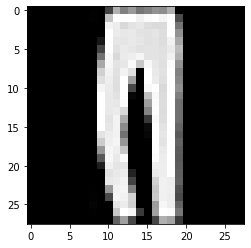

propability to be T-shirt/top is 0.00238% 
propability to be Trouser is 99.97818% 
propability to be Pullover is 0.00205% 
propability to be Dress is 0.00627% 
propability to be Coat is 0.01090% 
propability to be Sandal is 0.00000% 
propability to be Shirt is 0.00003% 
propability to be Sneaker is 0.00021% 
propability to be Bag is 0.00000% 
propability to be Ankle boot is 0.00000% 
-----------------------------------



   real: Trouser   pred: Trouser


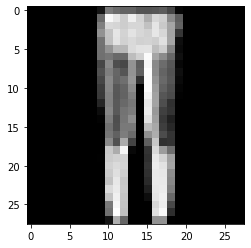

propability to be T-shirt/top is 0.00076% 
propability to be Trouser is 99.95276% 
propability to be Pullover is 0.00291% 
propability to be Dress is 0.03180% 
propability to be Coat is 0.01053% 
propability to be Sandal is 0.00001% 
propability to be Shirt is 0.00002% 
propability to be Sneaker is 0.00122% 
propability to be Bag is 0.00000% 
propability to be Ankle boot is 0.00000% 
-----------------------------------



   real: Shirt   pred: Shirt


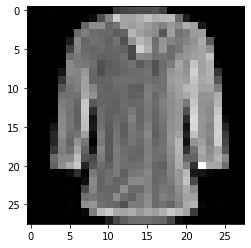

propability to be T-shirt/top is 14.86511% 
propability to be Trouser is 0.10712% 
propability to be Pullover is 12.17342% 
propability to be Dress is 1.44675% 
propability to be Coat is 1.07527% 
propability to be Sandal is 0.01422% 
propability to be Shirt is 69.93125% 
propability to be Sneaker is 0.00007% 
propability to be Bag is 0.38529% 
propability to be Ankle boot is 0.00150% 
-----------------------------------



   real: Trouser   pred: Trouser


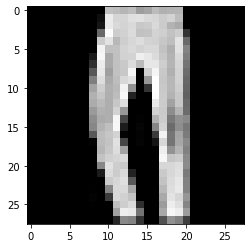

propability to be T-shirt/top is 0.13521% 
propability to be Trouser is 99.15041% 
propability to be Pullover is 0.04862% 
propability to be Dress is 0.08954% 
propability to be Coat is 0.56892% 
propability to be Sandal is 0.00001% 
propability to be Shirt is 0.00691% 
propability to be Sneaker is 0.00021% 
propability to be Bag is 0.00016% 
propability to be Ankle boot is 0.00000% 
-----------------------------------



   real: Coat   pred: Coat


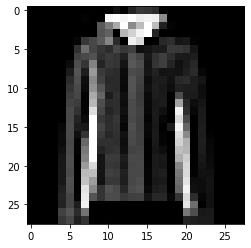

propability to be T-shirt/top is 0.57814% 
propability to be Trouser is 0.18206% 
propability to be Pullover is 2.14648% 
propability to be Dress is 0.07895% 
propability to be Coat is 82.21062% 
propability to be Sandal is 0.00424% 
propability to be Shirt is 14.52449% 
propability to be Sneaker is 0.00004% 
propability to be Bag is 0.27498% 
propability to be Ankle boot is 0.00001% 
-----------------------------------



   real: Shirt   pred: Shirt


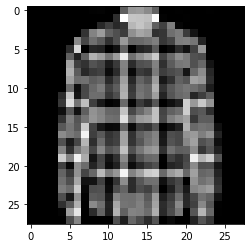

propability to be T-shirt/top is 0.34083% 
propability to be Trouser is 0.05534% 
propability to be Pullover is 5.94657% 
propability to be Dress is 0.26317% 
propability to be Coat is 22.56049% 
propability to be Sandal is 0.01597% 
propability to be Shirt is 70.11662% 
propability to be Sneaker is 0.00007% 
propability to be Bag is 0.70074% 
propability to be Ankle boot is 0.00020% 
-----------------------------------



   real: Sandal   pred: Sandal


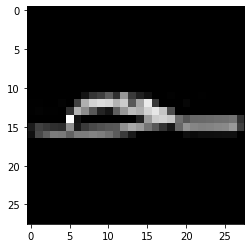

propability to be T-shirt/top is 0.74946% 
propability to be Trouser is 0.67573% 
propability to be Pullover is 0.97323% 
propability to be Dress is 1.52511% 
propability to be Coat is 0.31921% 
propability to be Sandal is 73.79325% 
propability to be Shirt is 0.90104% 
propability to be Sneaker is 19.15212% 
propability to be Bag is 1.83337% 
propability to be Ankle boot is 0.07749% 
-----------------------------------



   real: Sneaker   pred: Sneaker


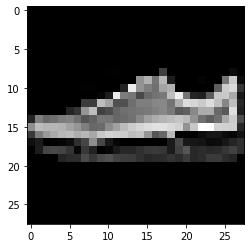

propability to be T-shirt/top is 0.00055% 
propability to be Trouser is 0.00185% 
propability to be Pullover is 0.00099% 
propability to be Dress is 0.00347% 
propability to be Coat is 0.00182% 
propability to be Sandal is 1.90426% 
propability to be Shirt is 0.00074% 
propability to be Sneaker is 97.89242% 
propability to be Bag is 0.08601% 
propability to be Ankle boot is 0.10790% 
-----------------------------------





In [ ]:
ml.neural_network_2hlayers()
ml.visualization()


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.96      0.97      1000
           2       0.79      0.80      0.79      1000
           3       0.85      0.89      0.87      1000
           4       0.80      0.81      0.80      1000
           5       0.97      0.95      0.96      1000
           6       0.69      0.63      0.66      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

   real: Ankle boot   pred: Ankle boot


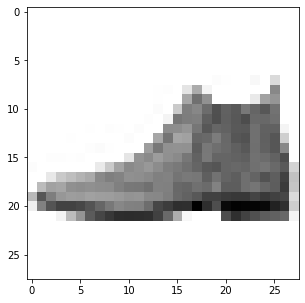

   real: Pullover   pred: Pullover


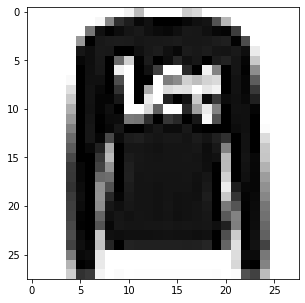

   real: Trouser   pred: Trouser


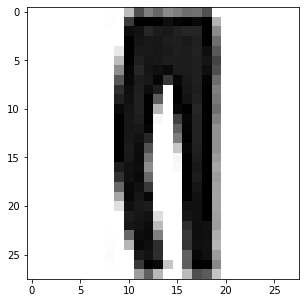

   real: Trouser   pred: Trouser


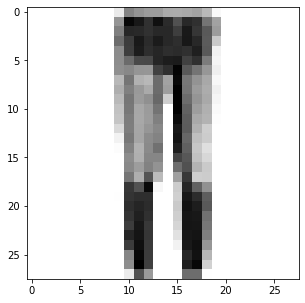

   real: Shirt   pred: Shirt


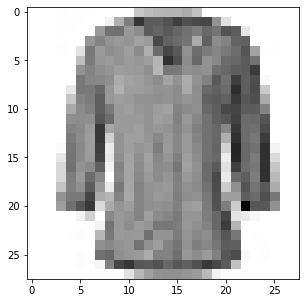

   real: Trouser   pred: Trouser


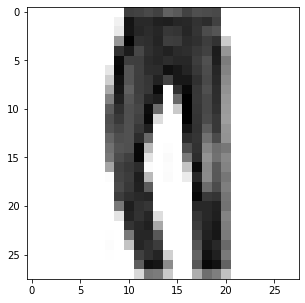

   real: Coat   pred: Coat


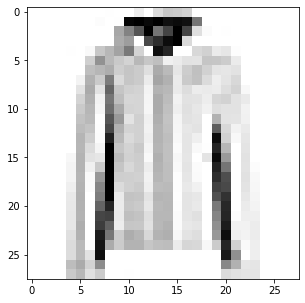

   real: Shirt   pred: Shirt


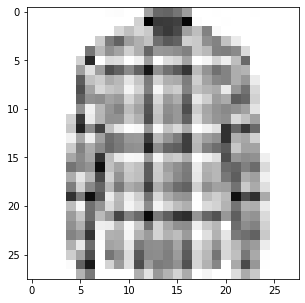

   real: Sandal   pred: Sandal


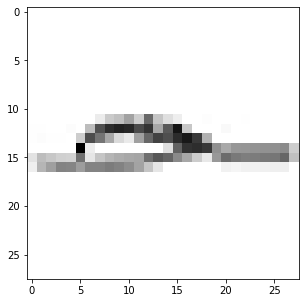

   real: Sneaker   pred: Sneaker


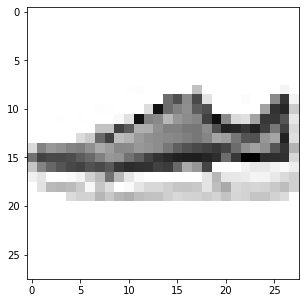

In [ ]:
ml.svm('rbf')
ml.visualization()